## Missing Value - Feature Engineering

2. Feature Engineering-- Handling Missing values
why are their missing values? 
let us suppose we are going survey on depression 
1. people will hesitate to put down the information
2. survey information are not that valid 
3. men hesitate to give information about their salaries 
4. women hesitate to tell their age 
5. people may have died 


Data Science Projects -- Dataset should be collected from multiple resources 
Data that will ge missing are :
1. continous data 
2. categorical data 



what are the different type of missing data?

Missing Completely at Random, MCAR:
Missing Completely at Random (MCAR) is a concept in missing data analysis that describes a type of missingness mechanism. 
When missing data is MCAR, it means that the missingness of data points has no systematic relationship to the observed or unobserved data. 
In other words, the missingness occurs randomly and independently of any values in the dataset.
    

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## this is the example of missing completely at random 
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. Missing data not at random(MNAR): Systematic missing values 
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. 

In [6]:
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

## finding the percentage of null values 
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
## this show that the people wo don't survive has more missing data of cabin then the people who don't 
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

## How to handle missing data

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation 
5. Arbitrary imputation
6. Frequent categories imputation

## 1. Mean/Median/Mode imputation
When should we apply?
Mean/Median imputation has the assumption that the data are missing completely at random (MCAR) . 
we solve this by replacing the NAN with the most frequent occurance of the variables. 


In [9]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [12]:
median=df.Age.median()
median

28.0

In [13]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [14]:
## after calculating standard deviation we get to know that their just a minor difference between age and age_median
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


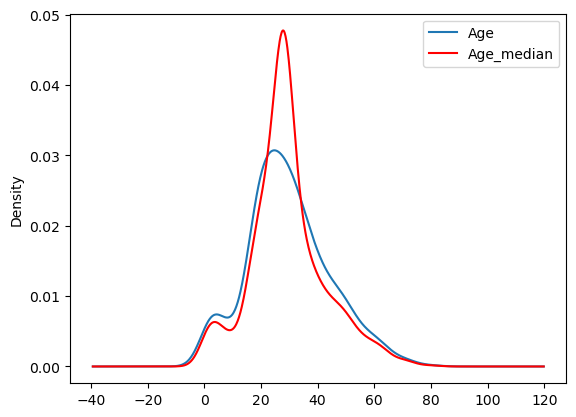

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advantages and disadvantages of mean/median imputation 

Advantages 
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset 

Disadvantages 
3. Change or distortion in the original variance 
4. Impacts correlation

### 2. Random Sample Imputation
 
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values. 
When should it be used?
It assumes that the data are missing completely at random (MCAR)

In [16]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [19]:
df['Age'].isnull().sum()

177

In [20]:
df['Age'].dropna().sample()

155    51.0
Name: Age, dtype: float64

In [21]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [22]:
## for getting total 177 values 
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [23]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have the random sample to fill the na values 
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [24]:
median=df.Age.median()
median

28.0

In [25]:
impute_nan(df,'Age',median)

In [26]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [27]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

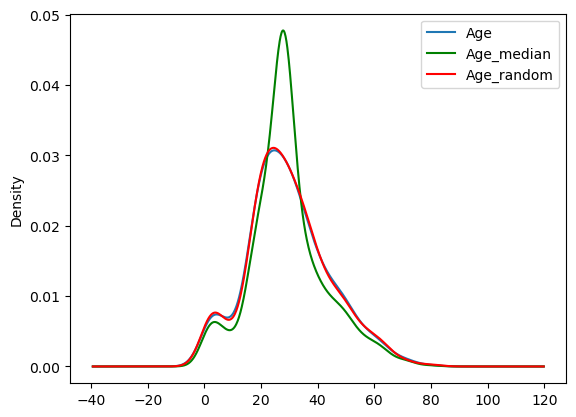

In [28]:
## After plotting the distribution curve we get to know that the distribution is almost similar 
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Advantages 
1. Easy to implement
2. There is less distortion in variance 


#### Disadvantages 
1. In every situation randomness won't work 

## 3. Capturing NaN values with a new features 
It works well if the data are not missing completely at random 

In [29]:
df=pd.read_csv("titanic.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
## here we are doing capturing nan values with a new features 
df['Age_NaN']= np.where(df['Age'].isnull(),1,0)

In [31]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [32]:
df.Age.median()

28.0

In [33]:
df['Age'].fillna(df.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Advantages
1. Easy to implement
2. captures the importance of missing values


### Disadvantages
1. Creating 10 additional features(Curese of Dimensionality)

## 4. End of distribution imputation
In this technique end data of the distribution is taken and put that data in the nan values 

In [34]:
df=pd.read_csv("titanic.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

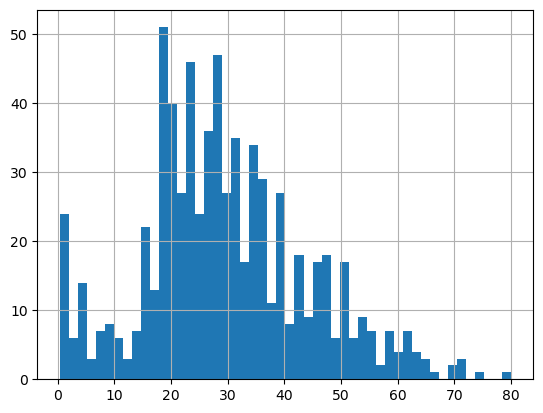

In [35]:
df.Age.hist(bins=50)

In [36]:
## for taking the end data we have to add the data of thired standard distribution 
extreme=df.Age.mean()+3*df.Age.std()





C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

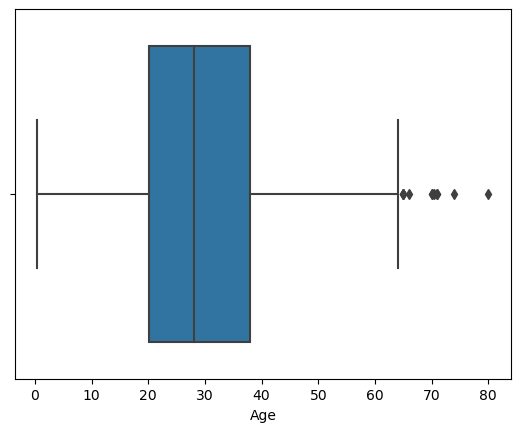

In [37]:
## Here it can be seen that we have outlies 
sns.boxplot('Age',data=df)

In [38]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [39]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [40]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

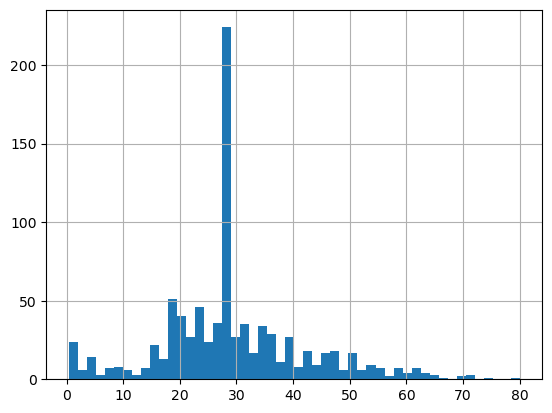

In [41]:
df.Age.hist(bins=50)

<AxesSubplot:>

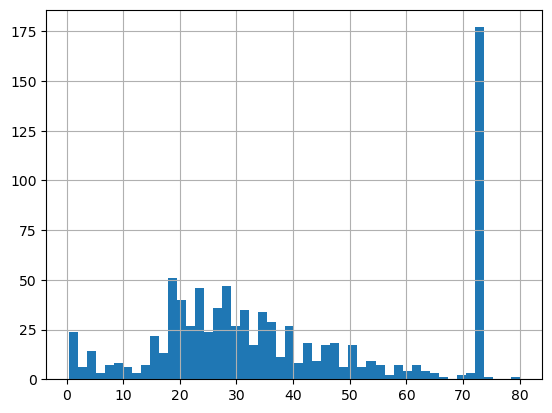

In [42]:
df.Age_end_distribution.hist(bins=50)

C:\Users\pouru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

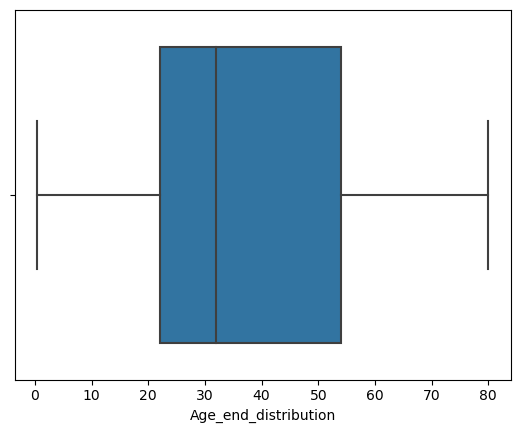

In [43]:
## which one is better to check this again we draw boxplot 
sns.boxplot('Age_end_distribution',data=df)

dur to puting extreme value in nan the outlier has gone
the outlier has been capture by the end of distribution 


## Advantages 
1. Easy to implement 
2. Captures the importance of missingess if there is any 

## Disadvantages 
1. Distorts the original distribution of the variables 
2. If missingness is not important. it may mask the predictive power of the original variable by distributing its distribution 
3. If the number of NA is big, it will mask true outliers in the distribution 
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering 

## 4. Arbitrary value imputation
It consists of replacing NaN by an arbitrary value 
while chosing the arbitrary value we must keep this in mind 
    1. The arbitrary value should not be frequently present.
    2. here we consisder the arbitrary value by taking it as an outliers 
    
## Advantages 
1. Easy to implement 
2. Captures the importance of missingness if there is one

## Disadvantages 
1. Distorts the original distribution of the variable 
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution 
3. Hard to decide which value to use 

In [44]:
df=pd.read_csv("titanic.csv",usecols=["Age",'Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
def impute_nan(df,variable):
    df[variable+'_zeros']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

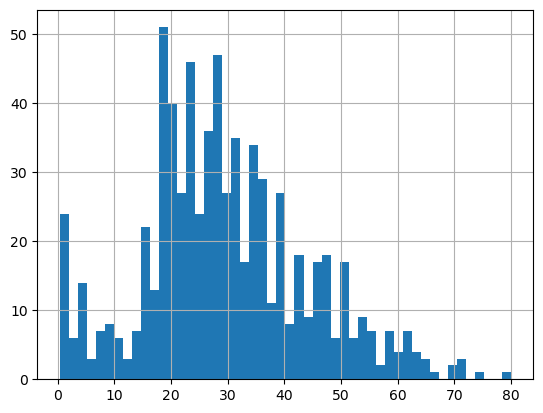

In [46]:
df.Age.hist(bins=50)

## How to handle caterogical missing values 

## Frequent category imputation

In [47]:
df=pd.read_csv("loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [48]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [50]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [51]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

## Compute the frequency with every features 

In [52]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

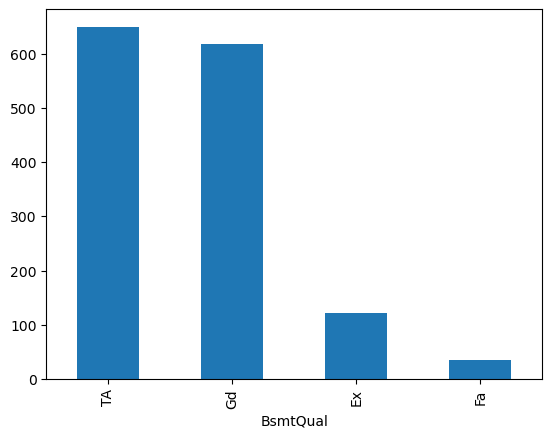

In [53]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

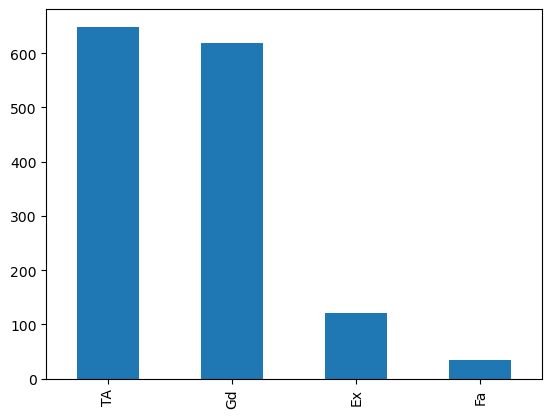

In [54]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

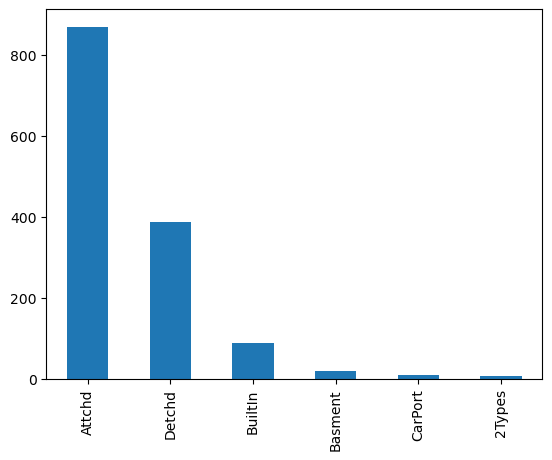

In [55]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

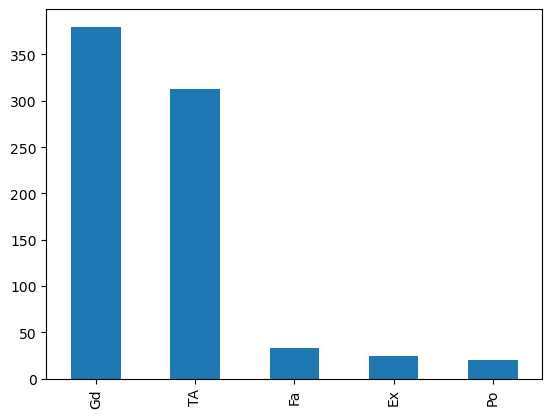

In [56]:
df['FireplaceQu'].value_counts().plot.bar()

In [57]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [58]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [59]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)
    

In [60]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Advantages 
1. Easy to implement. 
2. Faster way to implement. 
### Disadvantages 
1. Since we are using the most frequent labels, it may use them in a over represented way, if there are many nans. 
2. It distorts the relation of the most frequent label.

#### Adding a variable to capture NaN

In [61]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [62]:
import numpy as np 
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [64]:
frequent=df['BsmtQual'].mode()[0]

In [65]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [66]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [67]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [68]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### Suppose if you have more frequent categories, we just replace NaN with a new category 

In [69]:
df=pd.read_csv("loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [70]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [72]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [73]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [74]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [75]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Handle Categorical Features 
### One Hot Encoding 

In [76]:
df = pd.read_csv('titanic.csv',usecols=['Sex'])

In [77]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [78]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [79]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [80]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [81]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [82]:
df.dropna(inplace=True)

In [83]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### OneHotencoding with many categories in a features 

In [85]:
df=pd.read_csv('mercedes.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [86]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [87]:
df.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [88]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [89]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [90]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [91]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [92]:
import numpy as np 
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [93]:
lst_10.append('X1')

In [94]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
